In [ ]:
!pip install colab-xterm
%load_ext colabxterm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 KB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
!pip install pandasql

pd.set_option("display.max_colwidth",500)
pd.set_option("display.max_rows",500)
from pandasql import sqldf
psql = lambda q: sqldf(q, globals())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26782 sha256=9e1824fa448889be42982d15caf33c819071489f2da6cf24b4d0f671557705cb
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [ ]:
df=pd.read_csv("/content/cheapestelectriccars.csv")

In [ ]:
df.shape

(180, 11)

In [ ]:
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"â‚¬42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"Â£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"â‚¬29,990","Â£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"Â£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"â‚¬186,336","Â£138,830"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [ ]:
df.Name.nunique()

174

In [ ]:
df['UID'] = df['Name'] +df['Subtitle']
len(df['UID'].unique())

175

In [ ]:
df.UID.value_counts()

Hyundai Kona Electric 39 kWhBattery Electric Vehicle |       39.2 kWh             2
Hyundai Kona Electric 64 kWhBattery Electric Vehicle |       64 kWh               2
Audi e-tron Sportback 55 quattroBattery Electric Vehicle |       86.5 kWh         2
Audi e-tron 55 quattroBattery Electric Vehicle |       86.5 kWh                   2
Kia e-Soul 64 kWhBattery Electric Vehicle |       64 kWh                          2
Peugeot e-Traveller Standard 75 kWhBattery Electric Vehicle |       68 kWh        1
Peugeot e-Traveller Long 75 kWhBattery Electric Vehicle |       68 kWh            1
Seres 3 Battery Electric Vehicle |       52 kWh                                   1
Hyundai IONIQ 5 Project 45Battery Electric Vehicle |       72.6 kWh               1
Porsche Taycan Battery Electric Vehicle |       71 kWh                            1
Porsche Taycan PlusBattery Electric Vehicle |       83.7 kWh                      1
Tesla Model S Long RangeBattery Electric Vehicle |       90 kWh             

Cleaning Data


In [ ]:
df[df.UID.isin(['Hyundai Kona Electric 64 kWhBattery Electric Vehicle |       64 kWh',
                'Audi e-tron 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ,'Kia e-Soul 64 kWhBattery Electric Vehicle |       64 kWh'
               ,'Audi e-tron Sportback 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ])].sort_values(by='Name')



,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,UID
62,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,365 km,237 Wh/km,590 km/h,All Wheel Drive,5,NaN,71500.0,Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh
117,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,365 km,237 Wh/km,590 km/h,All Wheel Drive,5,"â‚¬81,500",NaN,Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,79900.0,Audi e-tron Sportback 55 quattroBattery Electric Vehicle | 86.5 kWh
118,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,"â‚¬83,750",NaN,Audi e-tron Sportback 55 quattroBattery Electric Vehicle | 86.5 kWh
34,Hyundai Kona Electric 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,395 km,162 Wh/km,370 km/h,Front Wheel Drive,5,"â‚¬41,850",NaN,Hyundai Kona Electric 64 kWhBattery Electric Vehicle | 64 kWh
133,Hyundai Kona Electric 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,395 km,162 Wh/km,370 km/h,Front Wheel Drive,5,"â‚¬41,850",32550.0,Hyundai Kona Electric 64 kWhBattery Electric Vehicle | 64 kWh
15,Kia e-Soul 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,370 km,173 Wh/km,350 km/h,Front Wheel Drive,5,NaN,37545.0,Kia e-Soul 64 kWhBattery Electric Vehicle | 64 kWh
78,Kia e-Soul 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,370 km,173 Wh/km,350 km/h,Front Wheel Drive,5,"â‚¬37,790",NaN,Kia e-Soul 64 kWhBattery Electric Vehicle | 64 kWh


Redusing Null values


In [ ]:
df.columns

Index(['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK', 'UID'],
      dtype='object')

In [ ]:
df=psql("""
            Select UID, Name, Subtitle, Acceleration, TopSpeed,
            Range, Efficiency, "FastChargeSpeed", Drive,
            NumberofSeats, max(cast(PriceinGermany as int)) as PriceinGermany,
            max(cast(PriceinUK as int)) as PriceinUK
            from df
            group by 1,2,3,4,5,6,7,8,9,10
    """)

In [ ]:
df[df.UID.isin(['Hyundai Kona Electric 64 kWhBattery Electric Vehicle |       64 kWh',
                'Audi e-tron 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ,'Kia e-Soul 64 kWhBattery Electric Vehicle |       64 kWh'
               ,'Audi e-tron Sportback 55 quattroBattery Electric Vehicle |       86.5 kWh'
               ])].sort_values(by='Name')

,UID,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
9,Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,365 km,237 Wh/km,590 km/h,All Wheel Drive,5,0.0,71500.0
15,Audi e-tron Sportback 55 quattroBattery Electric Vehicle | 86.5 kWh,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,0.0,79900.0
56,Hyundai Kona Electric 64 kWhBattery Electric Vehicle | 64 kWh,Hyundai Kona Electric 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,395 km,162 Wh/km,370 km/h,Front Wheel Drive,5,0.0,32550.0
66,Kia e-Soul 64 kWhBattery Electric Vehicle | 64 kWh,Kia e-Soul 64 kWh,Battery Electric Vehicle | 64 kWh,7.9 sec,167 km/h,370 km,173 Wh/km,350 km/h,Front Wheel Drive,5,0.0,37545.0


In [ ]:
df.Drive.unique()

array(['Front Wheel Drive', 'Rear Wheel Drive', 'All Wheel Drive'],
      dtype=object)

In [ ]:
df.FastChargeSpeed.unique()

array(['350 km/h', '410 km/h', '520 km/h', '490 km/h', '390 km/h',
       '500 km/h', '470 km/h', '590 km/h', '810 km/h', '840 km/h',
       '510 km/h', '540 km/h', '600 km/h', '270 km/h', '260 km/h',
       '630 km/h', '660 km/h', '620 km/h', '420 km/h', '480 km/h',
       '460 km/h', '440 km/h', '430 km/h', '550 km/h', '330 km/h',
       '250 km/h', '290 km/h', '240 km/h', '120 km/h', '400 km/h',
       '360 km/h', '380 km/h', '190 km/h', '890 km/h', '870 km/h',
       '860 km/h', '720 km/h', '710 km/h', '220 km/h', '210 km/h',
       '370 km/h', '160 km/h', '340 km/h', '920 km/h', '980 km/h',
       '950 km/h', '740 km/h', '230 km/h', '150 km/h', '1380 km/h',
       '1410 km/h', '1390 km/h', '180 km/h', '800 km/h', '280 km/h',
       '450 km/h', '530 km/h', '170 km/h', '850 km/h', '910 km/h',
       '750 km/h', '790 km/h', '960 km/h', '-', '310 km/h', '570 km/h',
       '820 km/h', '680 km/h', '830 km/h'], dtype=object)

In [ ]:
df.UID.nunique()

175

In [ ]:
df.shape

(175, 12)

In [ ]:
df['Battery Capacity'] = df.Subtitle.str.split('|',expand=True)[1]
df['Battery Capacity'] = df['Battery Capacity'].str.strip().str.split(' ',expand=True)[0]
df['Battery Capacity'] = df['Battery Capacity'].astype('float32').round(2)
df['Brand_Name']=df['Name'].str.split(' ',expand=True)[0]
df['Acceleration']=df['Acceleration'].str.split(' ',expand=True)[0].astype('float32')
df['TopSpeed']=df['TopSpeed'].str.split(' ',expand=True)[0].astype('float32')
df['Range']=df['Range'].str.split(' ',expand=True)[0].astype('float32')
df['Efficiency']=df['Efficiency'].str.split(' ',expand=True)[0].astype('float32')
df['FastChargeSpeed']=pd.to_numeric(df['FastChargeSpeed'].str.split(' ',expand=True)[0],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UID               175 non-null    object 
 1   Name              175 non-null    object 
 2   Subtitle          175 non-null    object 
 3   Acceleration      175 non-null    float32
 4   TopSpeed          175 non-null    float32
 5   Range             175 non-null    float32
 6   Efficiency        175 non-null    float32
 7   FastChargeSpeed   170 non-null    float64
 8   Drive             175 non-null    object 
 9   NumberofSeats     175 non-null    int64  
 10  PriceinGermany    166 non-null    float64
 11  PriceinUK         136 non-null    float64
 12  Battery Capacity  175 non-null    float32
 13  Brand_Name        175 non-null    object 
dtypes: float32(5), float64(3), int64(1), object(5)
memory usage: 15.8+ KB


In [ ]:
df.head(10)

,UID,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Battery Capacity,Brand_Name
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Battery Electric Vehicle | 63 kWh,7.5,150.0,335.0,188.0,350.0,Front Wheel Drive,5,0.0,NaN,63.000000,Aiways
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,0.0,42250.0,51.500000,Audi
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Battery Electric Vehicle | 76.6 kWh,8.5,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,0.0,NaN,76.599998,Audi
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,6.2,180.0,400.0,192.0,490.0,All Wheel Drive,5,0.0,52870.0,76.599998,Audi
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,0.0,40750.0,51.500000,Audi
5,Audi Q4 e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 e-tron 40,Battery Electric Vehicle | 76.6 kWh,8.5,160.0,405.0,189.0,500.0,Rear Wheel Drive,5,0.0,44990.0,76.599998,Audi
6,Audi Q4 e-tron 45 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 e-tron 45 quattro,Battery Electric Vehicle | 76.6 kWh,6.9,180.0,385.0,199.0,470.0,All Wheel Drive,5,0.0,NaN,76.599998,Audi
7,Audi Q4 e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,6.2,180.0,385.0,199.0,470.0,All Wheel Drive,5,0.0,51370.0,76.599998,Audi
8,Audi e-tron 50 quattroBattery Electric Vehicle | 64.7 kWh,Audi e-tron 50 quattro,Battery Electric Vehicle | 64.7 kWh,6.8,190.0,280.0,231.0,470.0,All Wheel Drive,5,0.0,60600.0,64.699997,Audi
9,Audi e-tron 55 quattroBattery Electric Vehicle | 86.5 kWh,Audi e-tron 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7,200.0,365.0,237.0,590.0,All Wheel Drive,5,0.0,71500.0,86.500000,Audi


In [ ]:
df.columns

Index(['UID', 'Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range',
       'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats',
       'PriceinGermany', 'PriceinUK', 'Battery Capacity', 'Brand_Name'],
      dtype='object')

In [ ]:
df.head()

,UID,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Battery Capacity,Brand_Name
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Battery Electric Vehicle | 63 kWh,7.5,150.0,335.0,188.0,350.0,Front Wheel Drive,5,0.0,NaN,63.000000,Aiways
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,0.0,42250.0,51.500000,Audi
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Battery Electric Vehicle | 76.6 kWh,8.5,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,0.0,NaN,76.599998,Audi
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,6.2,180.0,400.0,192.0,490.0,All Wheel Drive,5,0.0,52870.0,76.599998,Audi
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Battery Electric Vehicle | 51.5 kWh,9.0,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,0.0,40750.0,51.500000,Audi


Data Exploration


<AxesSubplot:>

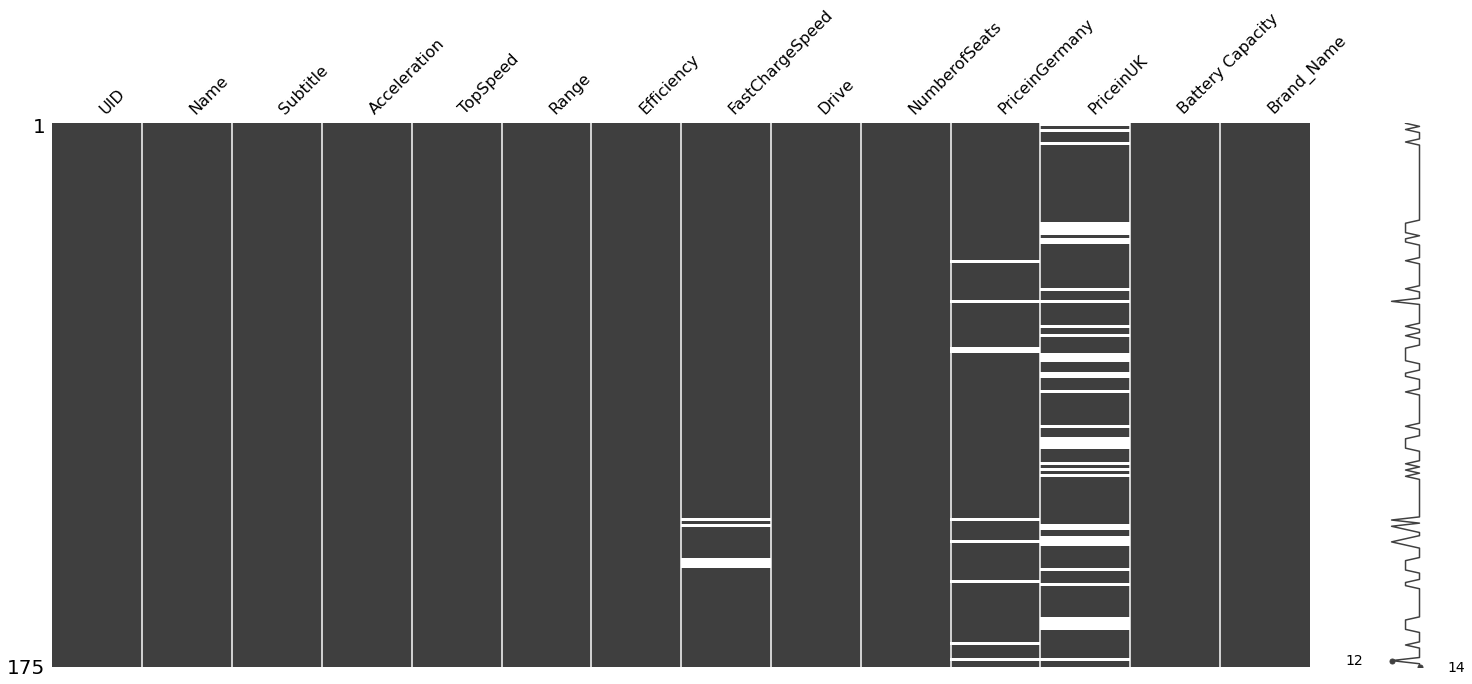

In [ ]:
msno.matrix(df)

In [ ]:
#Deleting Rows without a Price variable
df=df[(df.PriceinGermany.notnull()) | (df.PriceinUK.notnull())]

In [ ]:
df.shape

(172, 14)

<AxesSubplot:>

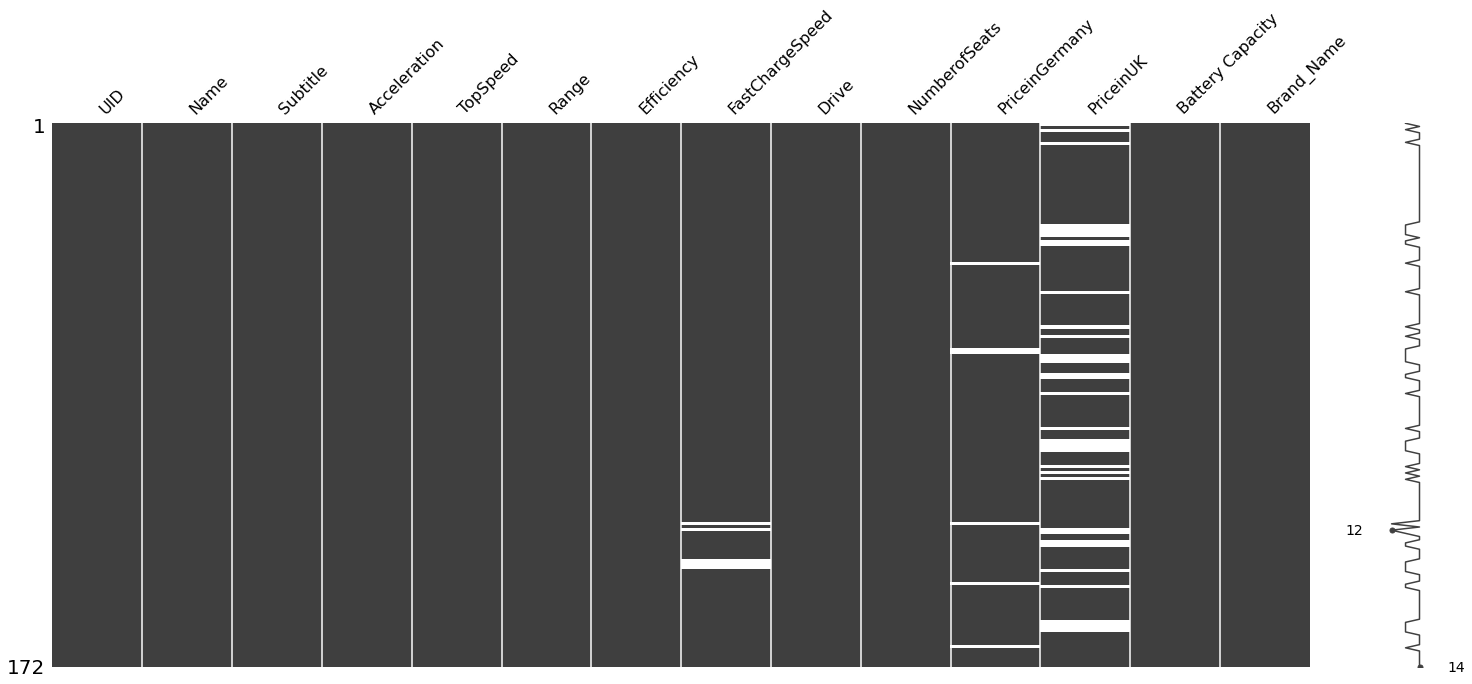

In [ ]:
msno.matrix(df)

In [ ]:
#Missing values in Fastcharge mean No fastcharging ports. Assigning 0 value to it will provide an appropriate numeric value to it
df.FastChargeSpeed =df.FastChargeSpeed.fillna(0)

Correlation


In [ ]:
df.corr()

,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK,Battery Capacity
Acceleration,1.000000,-0.820251,-0.712065,0.157551,-0.740878,0.318960,NaN,-0.664348,-0.619470
TopSpeed,-0.820251,1.000000,0.761700,-0.061426,0.772357,-0.243177,NaN,0.857726,0.689804
Range,-0.712065,0.761700,1.000000,-0.078438,0.769919,-0.068508,NaN,0.686669,0.892260
Efficiency,0.157551,-0.061426,-0.078438,1.000000,-0.078785,0.612157,NaN,0.337550,0.345705
FastChargeSpeed,-0.740878,0.772357,0.769919,-0.078785,1.000000,-0.121208,NaN,0.663077,0.656968
NumberofSeats,0.318960,-0.243177,-0.068508,0.612157,-0.121208,1.000000,NaN,-0.059764,0.136024
PriceinGermany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PriceinUK,-0.664348,0.857726,0.686669,0.337550,0.663077,-0.059764,NaN,1.000000,0.717208
Battery Capacity,-0.619470,0.689804,0.892260,0.345705,0.656968,0.136024,NaN,0.717208,1.000000


<AxesSubplot:>

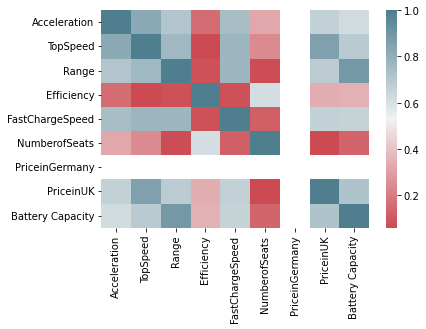

In [ ]:
sns.heatmap(abs(df.corr()),cmap=sns.diverging_palette(10, 220, s=60, as_cmap=True))

<AxesSubplot:>

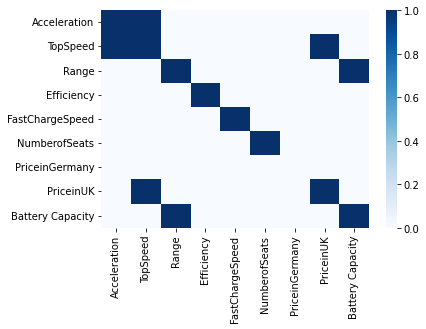

In [ ]:
sns.heatmap(abs(df.corr())>0.8,cmap='Blues')

In [ ]:
df_Acceleration = df.Acceleration
df=df.drop(columns=['Acceleration','Battery Capacity'])
df.head()

,UID,Name,Subtitle,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand_Name
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Battery Electric Vehicle | 63 kWh,150.0,335.0,188.0,350.0,Front Wheel Drive,5,0.0,NaN,Aiways
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Battery Electric Vehicle | 51.5 kWh,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,0.0,42250.0,Audi
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Battery Electric Vehicle | 76.6 kWh,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,0.0,NaN,Audi
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,180.0,400.0,192.0,490.0,All Wheel Drive,5,0.0,52870.0,Audi
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Battery Electric Vehicle | 51.5 kWh,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,0.0,40750.0,Audi


<AxesSubplot:>

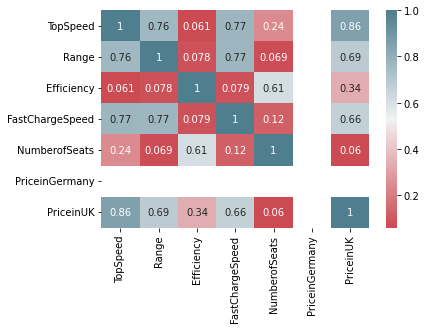

In [ ]:
sns.heatmap(abs(df.corr()),cmap=sns.diverging_palette(10, 220, s=60, as_cmap=True),annot=True)

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping dens

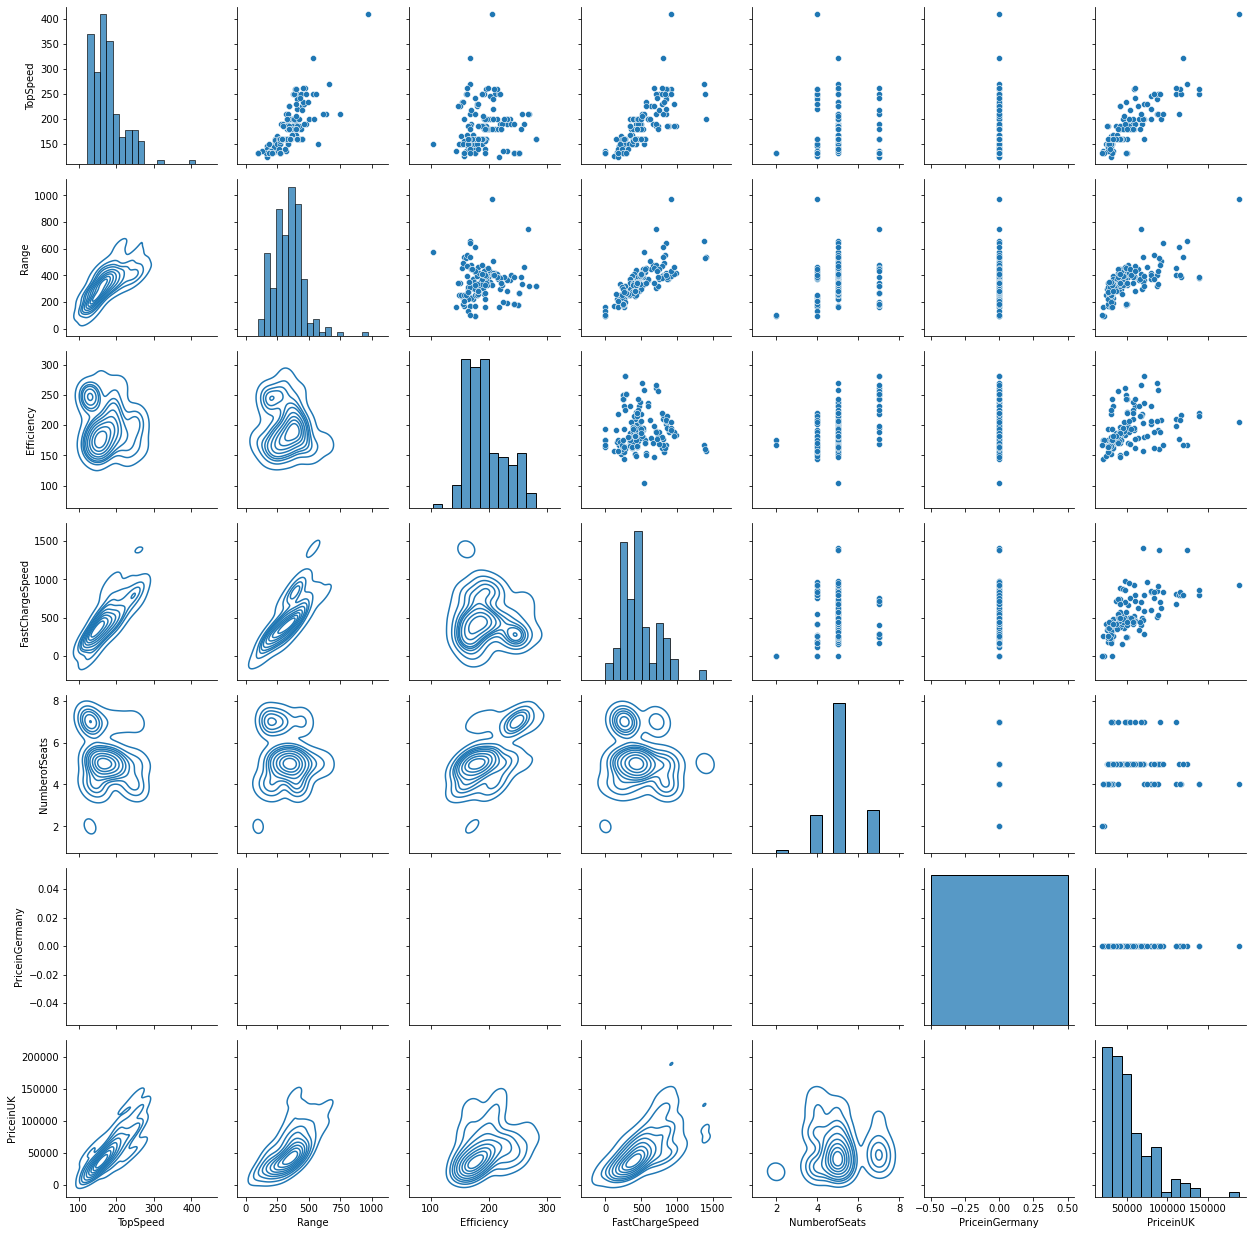

In [ ]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

[]

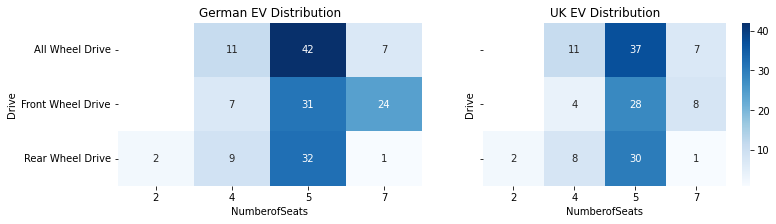

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(12,3),sharey=True)
sns.heatmap(df.pivot_table('PriceinGermany','Drive','NumberofSeats',aggfunc='count'),cmap='Blues',annot=True,ax=ax[0],cbar=False,)
ax[0].title.set_text('German EV Distribution')
sns.heatmap(df.pivot_table('PriceinUK','Drive','NumberofSeats',aggfunc='count'),cmap='Blues',annot=True,ax=ax[1],vmax=42,)
ax[1].title.set_text('UK EV Distribution')
plt.plot()

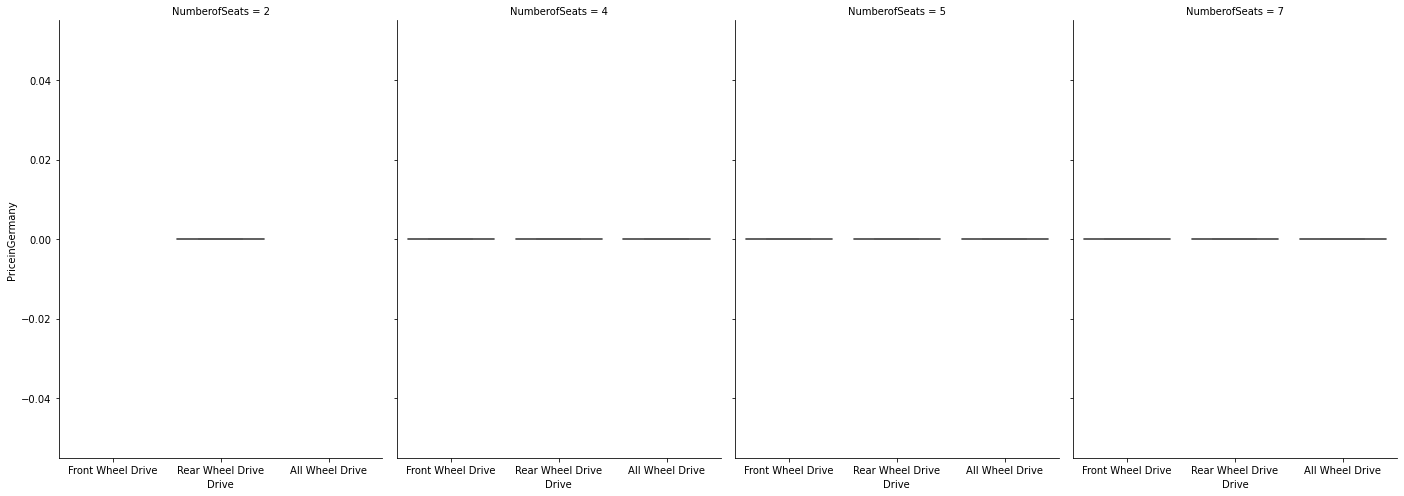

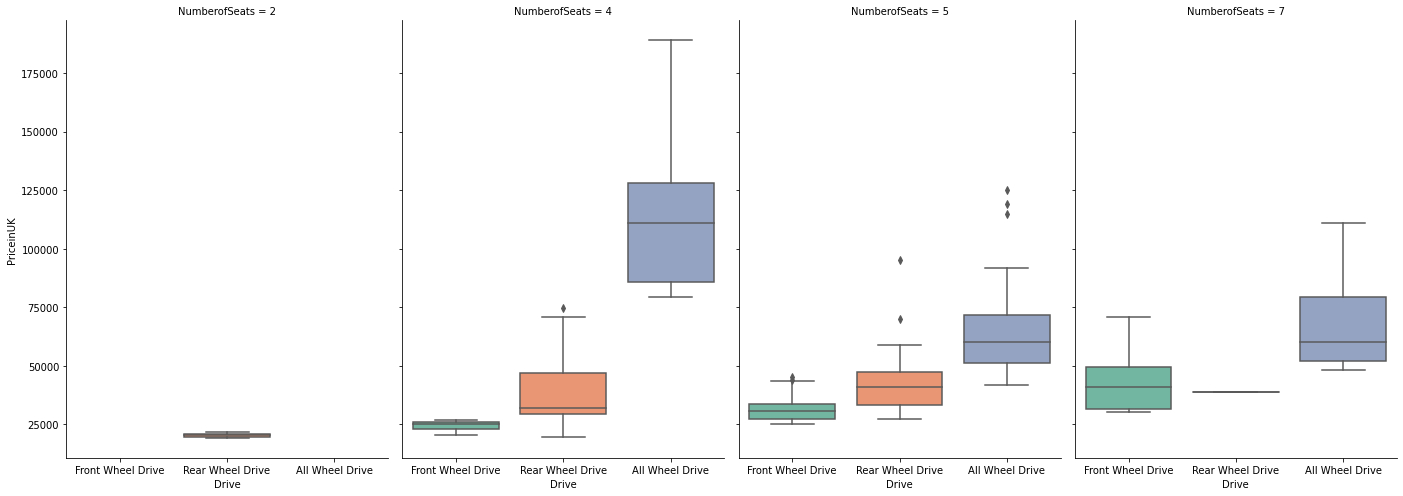

In [ ]:
sns.catplot(data=df,y='PriceinGermany',x='Drive',col='NumberofSeats',kind='box',height=7,aspect=0.7,palette='Set2')
            #fig.plot()
sns.catplot(data=df,y='PriceinUK',x='Drive',col='NumberofSeats',kind='box',height=7,aspect=0.7,palette='Set2')

Comments

The Most expensive electric cars are 4 seater, All wheel drives and have the widest range of price options
Cheapest Electric Cars are 2 Seater Rear wheel drives
Most of the Price distributions are right skewed

In [ ]:
df.head()

,UID,Name,Subtitle,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand_Name
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Battery Electric Vehicle | 63 kWh,150.0,335.0,188.0,350.0,Front Wheel Drive,5,0.0,NaN,Aiways
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Battery Electric Vehicle | 51.5 kWh,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,0.0,42250.0,Audi
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Battery Electric Vehicle | 76.6 kWh,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,0.0,NaN,Audi
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,180.0,400.0,192.0,490.0,All Wheel Drive,5,0.0,52870.0,Audi
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Battery Electric Vehicle | 51.5 kWh,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,0.0,40750.0,Audi


In [ ]:
df_Germany = df.drop(columns='PriceinUK').dropna()
df_Germany['Country'] = 'Germany'
df_Germany.rename(columns={'PriceinGermany':'Price'},inplace=True)

df_UK = df.drop(columns='PriceinGermany').dropna()
df_UK['Country'] = 'UK'
df_UK.rename(columns={'PriceinUK':'Price'},inplace=True)

In [ ]:
print(df_Germany.shape)
print(df_UK.shape)

(166, 12)
(136, 12)


In [ ]:
df_box= pd.DataFrame(columns=['Brand_Name','Country','Price'])
df_box =df_box.append(df_UK[['Brand_Name','Country','Price']])
df_box =df_box.append(df_Germany[['Brand_Name','Country','Price']])
df_box = df_box.sort_values(by='Price' ,ascending=False)

<ipython-input-48-d8ab1fcaf53d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_box =df_box.append(df_UK[['Brand_Name','Country','Price']])
<ipython-input-48-d8ab1fcaf53d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_box =df_box.append(df_Germany[['Brand_Name','Country','Price']])


In [ ]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 158 to 174
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand_Name  302 non-null    object 
 1   Country     302 non-null    object 
 2   Price       302 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.4+ KB


In [ ]:
df_box=df_box.groupby(by='Brand_Name').filter(lambda x: len(x) >10)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Brand_Name'>

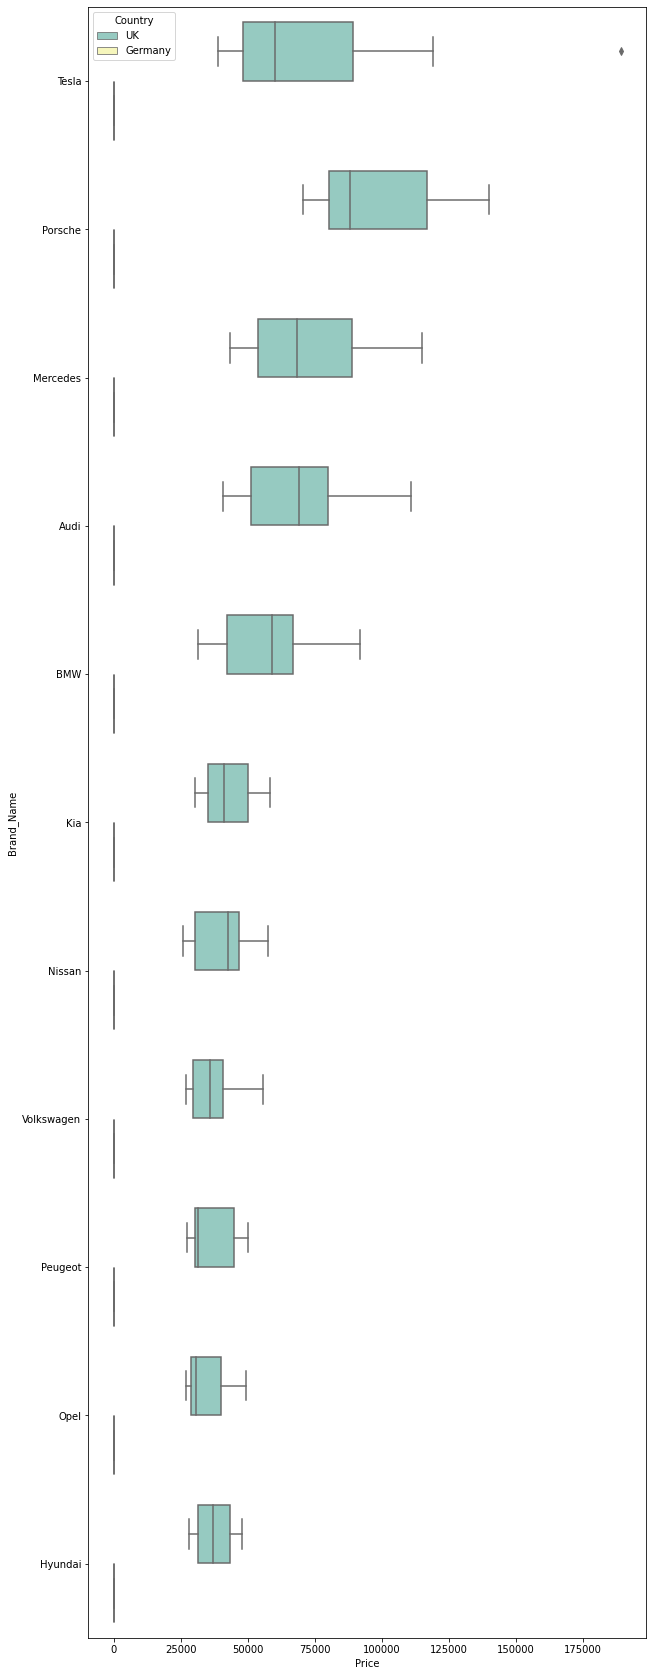

In [ ]:
f,ax= plt.subplots(1,1,figsize=(10,30),sharey=True)
sns.boxplot('Price','Brand_Name',data=df_box,hue='Country',ax=ax,palette='Set3')

In [ ]:
df.head()

,UID,Name,Subtitle,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand_Name
0,Aiways U5 Battery Electric Vehicle | 63 kWh,Aiways U5,Battery Electric Vehicle | 63 kWh,150.0,335.0,188.0,350.0,Front Wheel Drive,5,0.0,NaN,Aiways
1,Audi Q4 Sportback e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 Sportback e-tron 35,Battery Electric Vehicle | 51.5 kWh,160.0,295.0,175.0,410.0,Rear Wheel Drive,5,0.0,42250.0,Audi
2,Audi Q4 Sportback e-tron 40Battery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 40,Battery Electric Vehicle | 76.6 kWh,160.0,425.0,180.0,520.0,Rear Wheel Drive,5,0.0,NaN,Audi
3,Audi Q4 Sportback e-tron 50 quattroBattery Electric Vehicle | 76.6 kWh,Audi Q4 Sportback e-tron 50 quattro,Battery Electric Vehicle | 76.6 kWh,180.0,400.0,192.0,490.0,All Wheel Drive,5,0.0,52870.0,Audi
4,Audi Q4 e-tron 35Battery Electric Vehicle | 51.5 kWh,Audi Q4 e-tron 35,Battery Electric Vehicle | 51.5 kWh,160.0,280.0,184.0,390.0,Rear Wheel Drive,5,0.0,40750.0,Audi


<AxesSubplot:xlabel='Efficiency', ylabel='PriceinUK'>

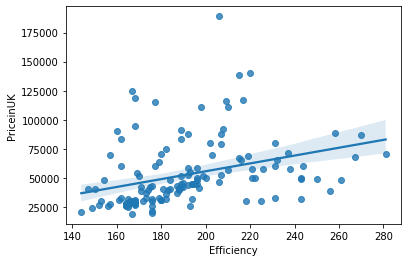

In [ ]:
sns.regplot(data=df,x='Efficiency',y='PriceinUK',)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
summaryU = smf.ols('PriceinUK ~ Efficiency', data = df).fit().summary()
summaryG = smf.ols('PriceinGermany ~ Efficiency', data = df).fit().summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1841: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


In [ ]:
print(smf.ols('PriceinUK ~ Efficiency', data = df,).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              PriceinUK   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     17.23
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           5.85e-05
Time:                        10:15:16   Log-Likelihood:                -1580.1
No. Observations:                 136   AIC:                             3164.
Df Residuals:                     134   BIC:                             3170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.157e+04   1.57e+04     -0.736      0.4

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
dfUK=df[df.PriceinUK.notnull()]
dfDE=df[df.PriceinGermany.notnull()]

In [ ]:
modelUK=LinearRegression()
modelDE=LinearRegression()

modelUK.fit(X=dfUK.Efficiency.to_numpy().reshape(-1,1),y=dfUK.PriceinUK.to_numpy().reshape(-1,1))
modelDE.fit(X=dfDE.Efficiency.to_numpy().reshape(-1,1),y=dfDE.PriceinGermany.to_numpy().reshape(-1,1))

LinearRegression()

In [ ]:
modelUK.rank_

1

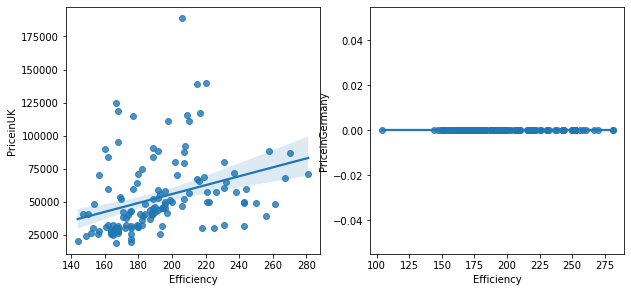

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(2,2,1)
p1 = sns.regplot(data=df,x='Efficiency',y='PriceinUK',ax=ax1)
ax2 = f.add_subplot(2,2,2)
p2 = sns.regplot(data=df,x='Efficiency',y='PriceinGermany',ax=ax2)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping dens

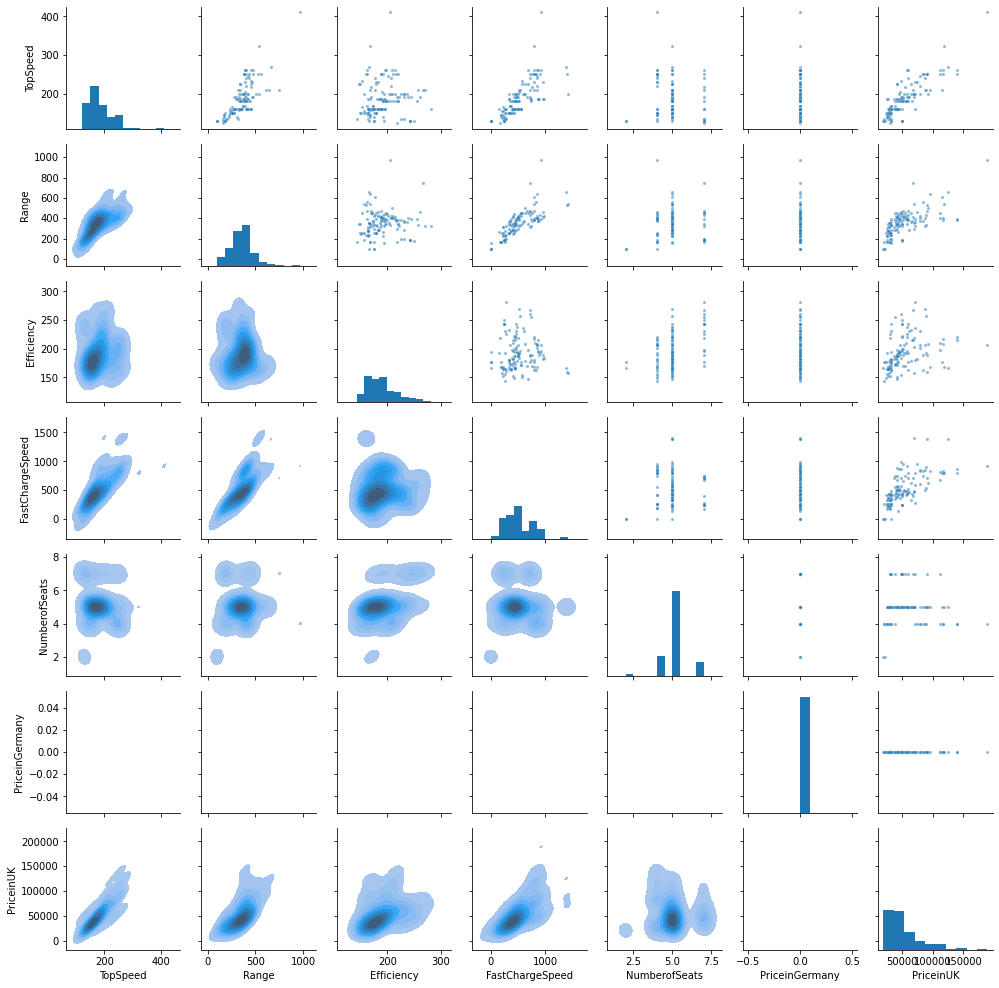

In [ ]:
g=sns.PairGrid(data=dfUK,height=2,aspect=1)
g.map_upper(sns.scatterplot, linewidths = 1, edgecolor = 'w', s = 10, alpha = 0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot,shade=True)

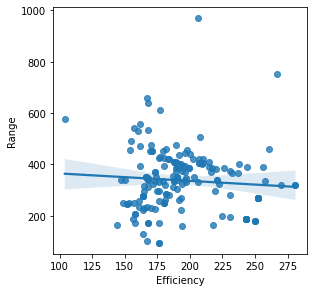

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(2,2,1)
p1 = sns.regplot(data=df,x='Efficiency',y='Range',ax=ax1)
#ax2 = f.add_subplot(2,2,2)
#p2 = sns.regplot(data=df,x='Efficiency',y='Range',ax=ax2)